In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, confusion_matrix

from regression_module import *

warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 4) Logistic Regression

In [4]:
# Read in data
df = pd.read_csv('data/reg_data.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerid        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  contract          7043 non-null   object 


In [17]:
df.isnull().sum()

Unnamed: 0          0
customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [9]:
# Remove unecessary columns from beginning of data ('Unnamed: 0', 'customerid')
df2 = df.iloc[:,2:]
df2.head(2)
df2.seniorcitizen


0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: seniorcitizen, Length: 7043, dtype: int64

In [18]:
# Replace churn string values with numeric binary values
df2.churn.replace({"Yes":1, "No":0}, inplace = True)
# Utilize pandas dummy variable function to create dummy variable series for categorical data
dummy_df = pd.get_dummies(df2)
dummy_df.to_csv('data/final_df.csv')
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   seniorcitizen                            7043 non-null   int64  
 1   tenure                                   7043 non-null   int64  
 2   monthlycharges                           7043 non-null   float64
 3   totalcharges                             7043 non-null   float64
 4   churn                                    7043 non-null   int64  
 5   gender_Female                            7043 non-null   uint8  
 6   gender_Male                              7043 non-null   uint8  
 7   partner_No                               7043 non-null   uint8  
 8   partner_Yes                              7043 non-null   uint8  
 9   dependents_No                            7043 non-null   uint8  
 10  dependents_Yes                           7043 no

# 4.1) Visualizing Correlations

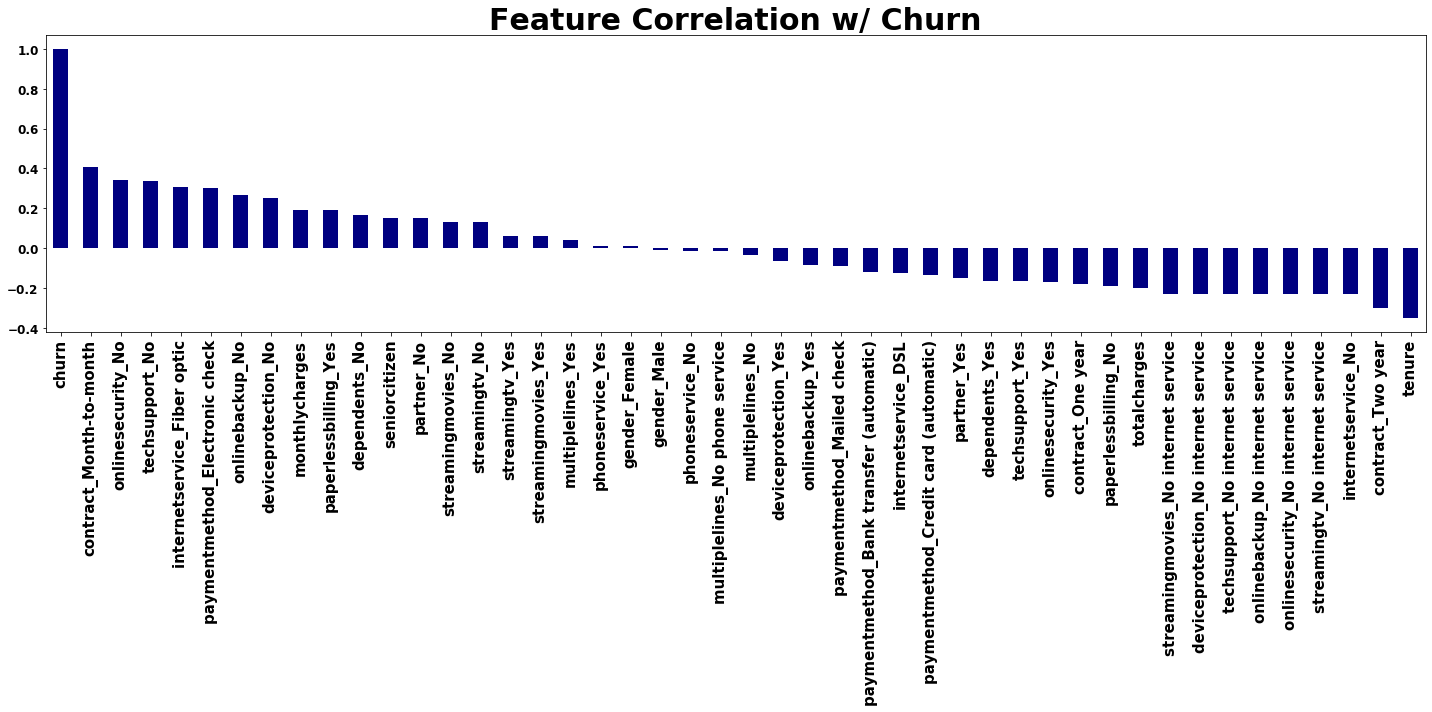

In [20]:
# Plot correlations between our features and our target feature, churn, as a bar plot, sort by descending order
dummy_df.corr()['churn'].sort_values(ascending = False).plot(kind='bar', figsize = (20, 10), color = 'Navy')
plt.title('Feature Correlation w/ Churn', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize = 15, fontweight = 'bold')
plt.yticks(fontweight = 'bold', fontsize = 12)
plt.savefig('pics/Regression_pics/corr.png')
plt.tight_layout()


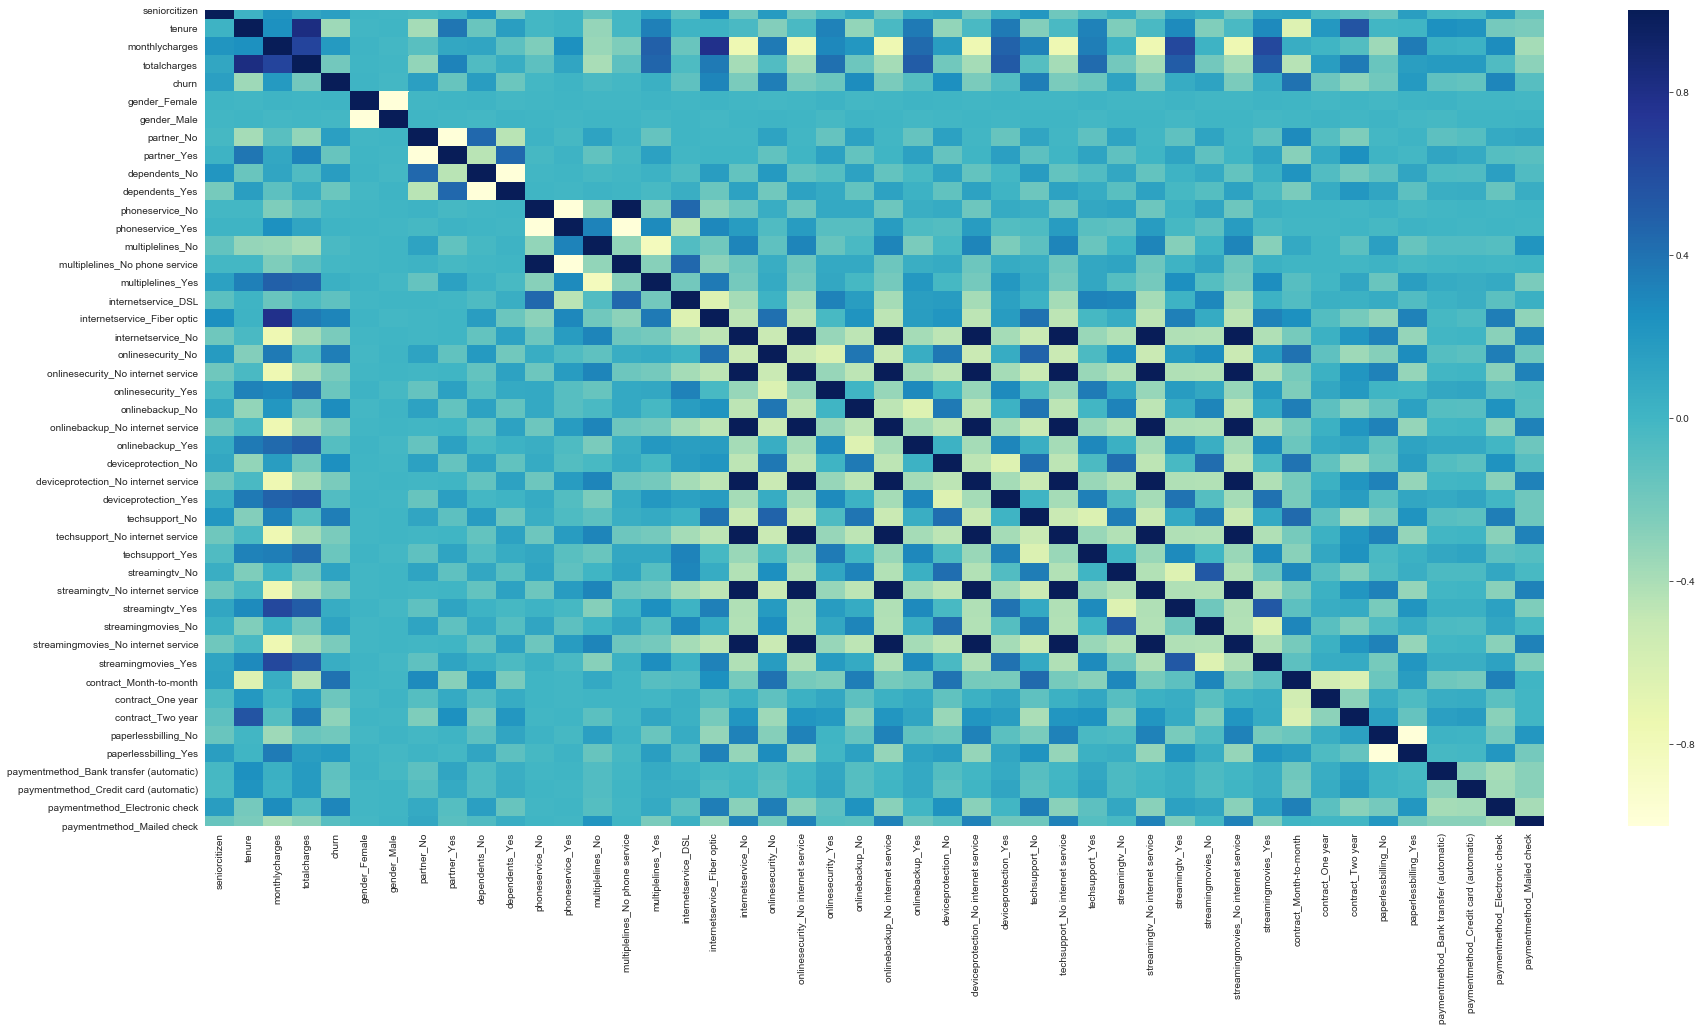

In [358]:
# Visualize a heatmap for our features correlation values
plt.figure(figsize = (30, 15))
x = sns.heatmap(dummy_df.corr(), cmap = 'YlGnBu')

## From our heatmap and correlation barplot, we see that monthly contract, and a lack of online security or techsupport have the strongest *positive* correlation with churn. 2-Year Contracts and not having internet service are the most negatively correlated with churn. 

# 4.2) Pre-Processing Data for Logistic Regression

In [359]:
# Establish our target feature, churn, as our y feature
y = dummy_df.churn.values
# Drop our target feature from our features dataframe
X = dummy_df.drop('churn', axis = 1)
# Save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

# 4.3) Scaling our Data

In [360]:
# Instantiate min-max scaling object
mm = MinMaxScaler()
# Fit and transform our feature dataframe
X = pd.DataFrame(mm.fit_transform(X))
# Reassign column names so new dataframe has corresponding names
X.columns = cols

# 4.4) Train Test Split

In [361]:
# Perform train test split from our target feature series and the predicting feature dataframe (set test size to 25% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 33)

# 4.5) Building the Model

In [362]:
# Instantiate a Logistic Regression model without an intercept. C is set to an arbitrarily large number. Use 'liblinear' solver method.
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver = 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [363]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

# 4.6) Evaluating Model Performance

## How many times was the classifier correct on the training set?

In [364]:
# Find residual differences between train data and predicted train data
residuals = np.abs(y_train - y_hat_train)
# Print value counts of our predicted values 
print(pd.Series(residuals).value_counts())
print('----------------------------------')
# Print normalized value counts of our predicted values
print(pd.Series(residuals).value_counts(normalize = True))

0    4270
1    1012
dtype: int64
----------------------------------
0    0.808406
1    0.191594
dtype: float64


## **Train Set Results:**
* 4270 Correct (1012 Incorrect)
* 80.8 % Accuracy

## How many times was the classifier correct on the test set?


In [365]:
# Repeat previous step with test data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('---------------------------------')
print(pd.Series(residuals).value_counts(normalize = True))

0    1409
1     352
dtype: int64
---------------------------------
0    0.800114
1    0.199886
dtype: float64


## **Test Set Results:**
* 1409 Correct (352 Incorrect)
* 80.01% Accuracy

## Confusion Matrix

In [371]:
# Call confusion_matrix function from sklearn.metrics using actual y_test and predicted y_test data sets 
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[1153  128]
 [ 224  256]]


In [368]:
# Print 4 main logistic model metrics for training and test sets (Precision, Recall, Accuracy, F1)
print_metrics(y_train, y_hat_train, y_test, y_hat_test)

Training Precision:  0.6615252784918595
Testing Precision:  0.6666666666666666


Training Recall:  0.5557955363570914
Testing Recall:  0.5333333333333333


Training Accuracy:  0.8084059068534646
Testing Accuracy:  0.8001135718341851


Training F1-Score:  0.6040688575899844
Testing F1-Score:  0.5925925925925926


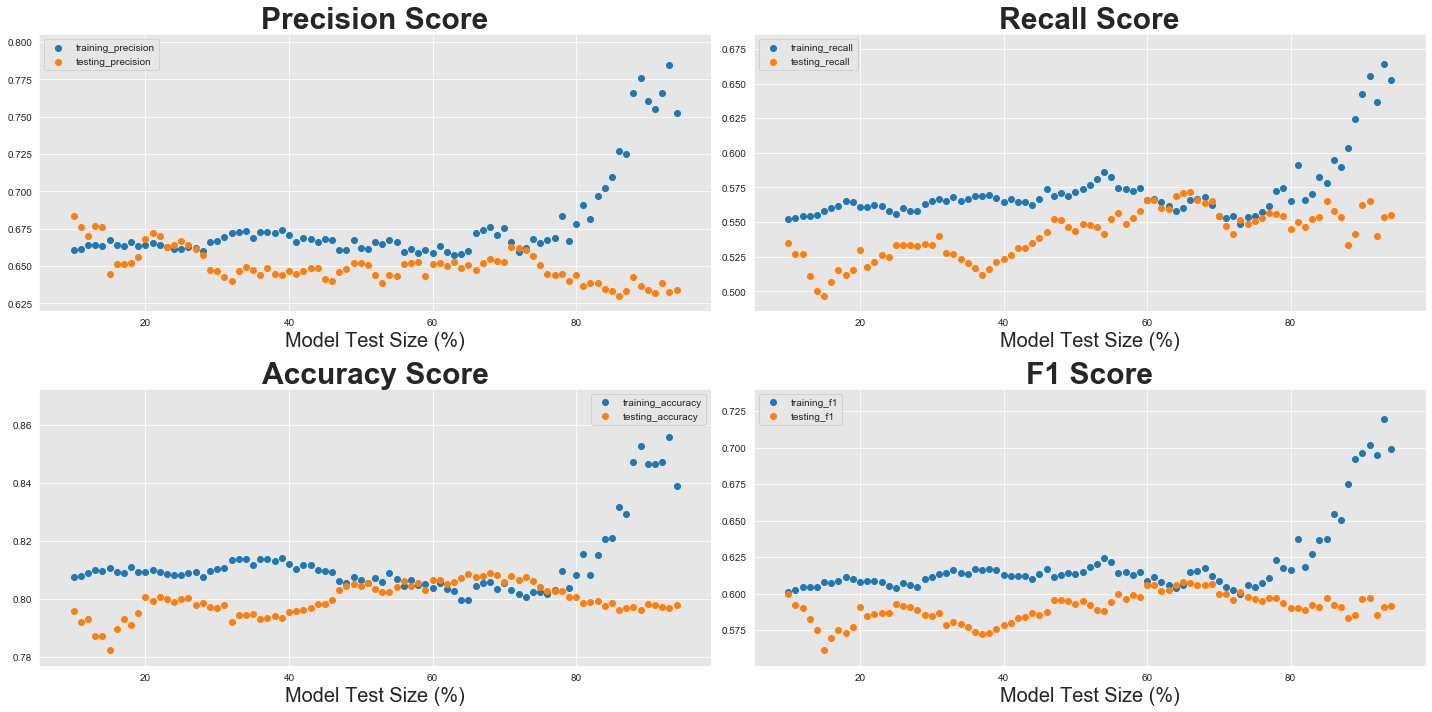

In [369]:
# Print residual scatter plot for 4 main logistic model metrics, iterating through the model and passing multiple 
# test-size objects to visualize effects of train/test size on model performance
print_metric_comparisons(X, y)

## Plot ROC Curves
We will now calculate probability scores for our y-train and y-test datasets. We use the false positive and true positive rates to plot a ROC Curve (receiver operating characteristic curve) for both train and test sets.

Training AUC: 0.8517288511601837
Test AUC: 0.8388417252146761


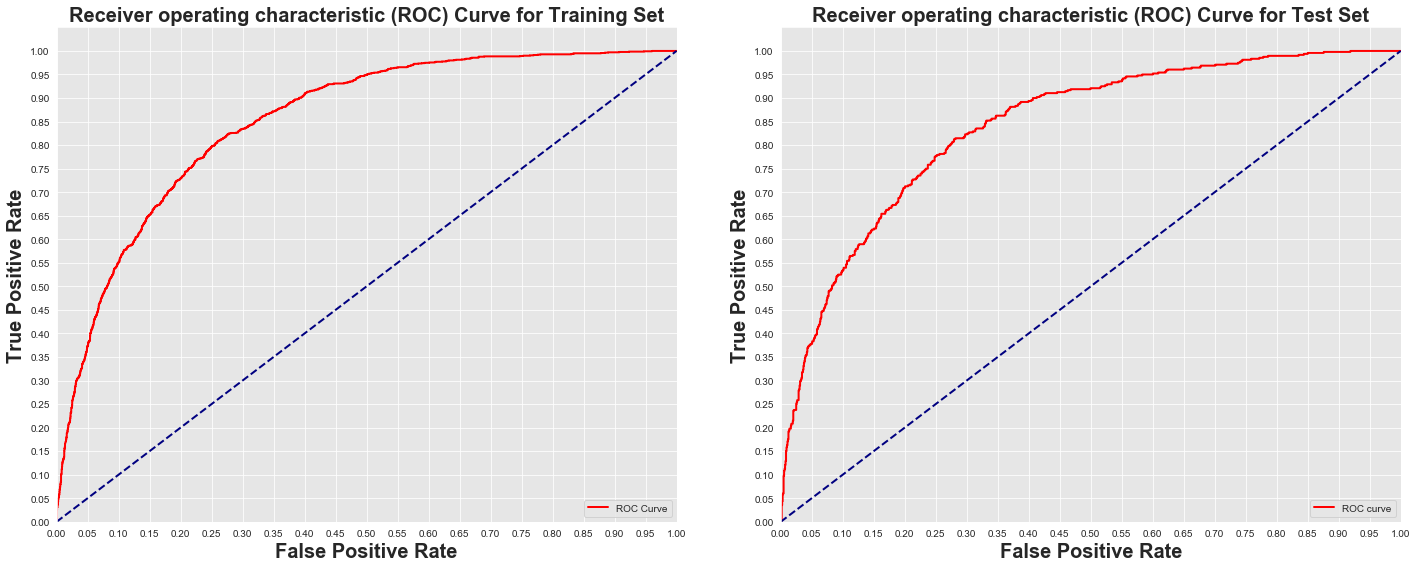

In [373]:
plot_auc(logreg, X_train, X_test, y_train, y_test)